In [2]:
# !pip install pykan
# !pip install -e pykan/.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 2.6 MB/s eta 0:00:00


In [3]:
import torch
import matplotlib.pyplot as plt
import pickle as pkl
from kan import KAN, create_dataset
from kan.MLP import MLP as kan_MLP
from kan.feynman import get_feynman_dataset

In [4]:
torch.cuda.is_available()

False

In [5]:
class MLP(kan_MLP):

    def __init__(self, width, act='silu', save_act=True, seed=0, device='cpu'):
        super(MLP, self).__init__(width, act, save_act, seed, device)
    
        if act == 'silu':
            self.act_fun = torch.nn.SiLU()
        elif act == 'relu':
            self.act_fun = torch.nn.ReLU()
        elif act == 'tanh':
            self.act_fun = torch.nn.Tanh()

## Tests with dataset I.6.20

### Initial testing

Dataset I.6.20 generated.
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20, 50, 100, 200]
Training grid: 3


| train_loss: 3.47e-04 | test_loss: 3.85e-04 | reg: 7.98e+00 | : 100%|█| 200/200 [00:57<00:00,  3.47


saving model version 0.1
Grid: 3, Train RMSE: 3.4709e-04, Test RMSE: 3.8522e-04
saving model version 0.2
Training grid: 5


| train_loss: 2.16e-04 | test_loss: 2.39e-04 | reg: 7.60e+00 | : 100%|█| 200/200 [00:30<00:00,  6.53


saving model version 0.3
Grid: 5, Train RMSE: 2.1574e-04, Test RMSE: 2.3851e-04
saving model version 0.4
Training grid: 10


| train_loss: 1.50e-04 | test_loss: 1.74e-04 | reg: 7.46e+00 | : 100%|█| 200/200 [00:44<00:00,  4.49


saving model version 0.5
Grid: 10, Train RMSE: 1.5002e-04, Test RMSE: 1.7404e-04
saving model version 0.6
Training grid: 20


| train_loss: 6.49e-05 | test_loss: 1.04e-04 | reg: 9.16e+00 | : 100%|█| 200/200 [01:29<00:00,  2.24


saving model version 0.7
Grid: 20, Train RMSE: 6.4931e-05, Test RMSE: 1.0375e-04
saving model version 0.8
Training grid: 50


| train_loss: 4.39e-03 | test_loss: 1.99e-02 | reg: 8.48e+00 | : 100%|█| 200/200 [01:40<00:00,  1.99


saving model version 0.9
Grid: 50, Train RMSE: 4.3857e-03, Test RMSE: 1.9942e-02
saving model version 0.10
Training grid: 100


| train_loss: 1.88e-03 | test_loss: 2.21e-02 | reg: 8.49e+00 | : 100%|█| 200/200 [02:58<00:00,  1.12


saving model version 0.11
Grid: 100, Train RMSE: 1.8837e-03, Test RMSE: 2.2141e-02
saving model version 0.12
Training grid: 200


| train_loss: 1.52e-03 | test_loss: 2.60e-02 | reg: 8.51e+00 | : 100%|█| 200/200 [05:55<00:00,  1.78


saving model version 0.13
Grid: 200, Train RMSE: 1.5168e-03, Test RMSE: 2.5986e-02


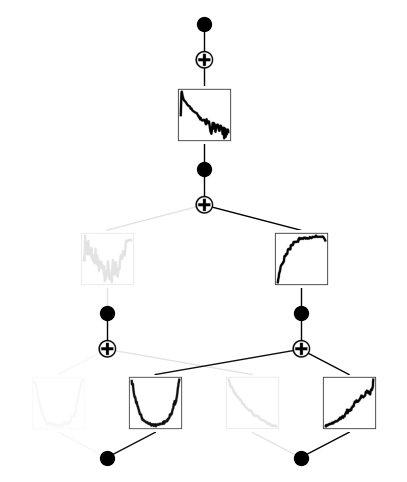

In [ ]:
# Set seed
seed = 42
torch.manual_seed(seed)
# 1. Get Feynman Dataset Info
dataset_name = 'I.6.20'
symbol, expr, f, ranges = get_feynman_dataset(dataset_name)
# 2. Create Dataset
# n_var is the number of input variables (len(ranges))
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=1000, test_num=1000, seed=seed)
print(f"Dataset {dataset_name} generated.")

# 3. Initialize KAN Model with coarse grid G=3

model = KAN(width=[len(ranges), 2, 1, 1], grid=3, k=3, seed=seed)

# 4. Train with Grid Extension (Paper Protocol)
# "increasing number of grid points every 200 steps to cover G = {3,5,10,20,50,100,200}"
grids = [3, 5, 10, 20, 50, 100, 200]
steps_per_grid = 200
print(f"Starting training with grids: {grids}")
for i, g in enumerate(grids):
    if i > 0:
        # Refine the grid to the new size 'g'
        # This returns a NEW model with finer grid, initialized from the old one
        model = model.refine(g)
    
    print(f"Training grid: {g}")
    # Train for 200 steps
    results = model.fit(dataset, opt="LBFGS", steps=steps_per_grid, lamb=0.0)
    
    print(f"Grid: {g}, Train RMSE: {results['train_loss'][-1]:.4e}, Test RMSE: {results['test_loss'][-1]:.4e}")
# 5. Plot final model
model.plot()
plt.show()

Dataset I.6.20 generated.
Using (2, 2, 1, 1) KAN
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20, 50, 100, 200]
Training grid: 3


| train_loss: 2.09e-03 | test_loss: 2.11e-03 | reg: 8.52e+00 | : 100%|█| 200/200 [06:35<00:00,  1.98


saving model version 0.1
Grid: 3, Train RMSE: 2.0906e-03, Test RMSE: 2.1050e-03
saving model version 0.2
Training grid: 5


| train_loss: 1.16e-03 | test_loss: 1.17e-03 | reg: 8.45e+00 | : 100%|█| 200/200 [07:08<00:00,  2.14


saving model version 0.3
Grid: 5, Train RMSE: 1.1561e-03, Test RMSE: 1.1689e-03
saving model version 0.4
Training grid: 10


| train_loss: 4.70e-04 | test_loss: 4.82e-04 | reg: 7.86e+00 | : 100%|█| 200/200 [08:37<00:00,  2.59


saving model version 0.5
Grid: 10, Train RMSE: 4.7036e-04, Test RMSE: 4.8189e-04
saving model version 0.6
Training grid: 20


| train_loss: 3.25e-04 | test_loss: 3.38e-04 | reg: 7.84e+00 | : 100%|█| 200/200 [11:14<00:00,  3.37


saving model version 0.7
Grid: 20, Train RMSE: 3.2534e-04, Test RMSE: 3.3790e-04
saving model version 0.8
Training grid: 50


| train_loss: 2.44e-04 | test_loss: 2.53e-04 | reg: 7.92e+00 | : 100%|█| 200/200 [20:01<00:00,  6.01


saving model version 0.9
Grid: 50, Train RMSE: 2.4385e-04, Test RMSE: 2.5270e-04
saving model version 0.10
Training grid: 100


| train_loss: 2.38e-04 | test_loss: 2.51e-04 | reg: 7.92e+00 | : 100%|█| 200/200 [15:52<00:00,  4.76


saving model version 0.11
Grid: 100, Train RMSE: 2.3789e-04, Test RMSE: 2.5056e-04
saving model version 0.12
Training grid: 200


| train_loss: 2.31e-04 | test_loss: 2.56e-04 | reg: 7.92e+00 | : 100%|█| 200/200 [28:40<00:00,  8.60


saving model version 0.13
Grid: 200, Train RMSE: 2.3127e-04, Test RMSE: 2.5642e-04


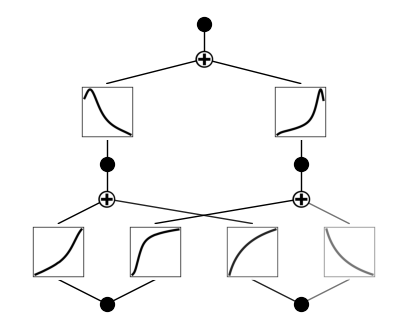

In [ ]:
import torch
import matplotlib.pyplot as plt
from kan import KAN, create_dataset
from kan.feynman import get_feynman_dataset
# Set seed
seed = 42
torch.manual_seed(seed)
# 1. Get Feynman Dataset Info
dataset_name = 'I.6.20'
symbol, expr, f, ranges = get_feynman_dataset(dataset_name)
# 2. Create Dataset
# n_var is the number of input variables (len(ranges))
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=15000, test_num=15000, seed=seed)
print(f"Dataset {dataset_name} generated.")

# 3. Initialize KAN Model with coarse grid G=3

print(f'Using {len(ranges), 2, 1, 1} KAN')
model = KAN(width=[len(ranges), 2, 1], grid=3, k=3, seed=seed)

# 4. Train with Grid Extension (Paper Protocol)
# "increasing number of grid points every 200 steps to cover G = {3,5,10,20,50,100,200}"
grids = [3, 5, 10, 20, 50, 100, 200]
steps_per_grid = 200
print(f"Starting training with grids: {grids}")
for i, g in enumerate(grids):
    if i > 0:
        # Refine the grid to the new size 'g'
        # This returns a NEW model with finer grid, initialized from the old one
        model = model.refine(g)
    
    print(f"Training grid: {g}")
    # Train for 200 steps
    results = model.fit(dataset, opt="LBFGS", steps=steps_per_grid, lamb=0.0)
    
    print(f"Grid: {g}, Train RMSE: {results['train_loss'][-1]:.4e}, Test RMSE: {results['test_loss'][-1]:.4e}")
# 5. Plot final model
model.plot()
plt.show()

Dataset I.6.20 generated.
Using (2, 2, 1, 1) KAN
checkpoint directory created: ./model
saving model version 0.0
Dataset moved to CUDA.
Starting training with grids: [3, 5, 10, 20, 50, 100, 200]
Training grid: 3


description:   0%|                                                          | 0/200 [00:00<?, ?it/s]

| train_loss: 1.69e-03 | test_loss: 1.68e-03 | reg: 8.37e+00 | : 100%|█| 200/200 [00:46<00:00,  4.34


saving model version 0.1
Grid: 3, Train RMSE: 1.6873e-03, Test RMSE: 1.6785e-03
saving model version 0.2
Training grid: 5


| train_loss: 1.32e-03 | test_loss: 1.38e-03 | reg: 8.48e+00 | : 100%|█| 200/200 [00:44<00:00,  4.54


saving model version 0.3
Grid: 5, Train RMSE: 1.3249e-03, Test RMSE: 1.3831e-03
saving model version 0.4
Training grid: 10


| train_loss: 4.60e-04 | test_loss: 4.99e-04 | reg: 8.41e+00 | : 100%|█| 200/200 [00:35<00:00,  5.68


saving model version 0.5
Grid: 10, Train RMSE: 4.6021e-04, Test RMSE: 4.9874e-04
saving model version 0.6
Training grid: 20


| train_loss: 2.25e-04 | test_loss: 3.25e-04 | reg: 8.44e+00 | : 100%|█| 200/200 [00:24<00:00,  8.07


saving model version 0.7
Grid: 20, Train RMSE: 2.2455e-04, Test RMSE: 3.2521e-04
saving model version 0.8
Training grid: 50


| train_loss: 1.16e-04 | test_loss: 2.74e-04 | reg: 8.44e+00 | : 100%|█| 200/200 [00:29<00:00,  6.74


saving model version 0.9
Grid: 50, Train RMSE: 1.1637e-04, Test RMSE: 2.7409e-04
saving model version 0.10
Training grid: 100


| train_loss: 8.90e-05 | test_loss: 2.84e-04 | reg: 8.44e+00 | : 100%|█| 200/200 [00:20<00:00,  9.65


saving model version 0.11
Grid: 100, Train RMSE: 8.9032e-05, Test RMSE: 2.8356e-04
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:41<00:00,  4.79it/s]


saving model version 0.13
Grid: 200, Train RMSE: nan, Test RMSE: nan


ValueError: alpha (nan) is outside 0-1 range

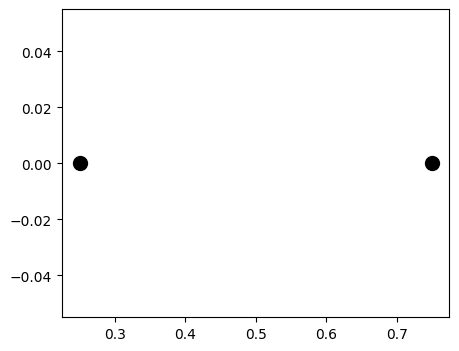

In [ ]:
import torch
import matplotlib.pyplot as plt
from kan import KAN, create_dataset
from kan.feynman import get_feynman_dataset
# Set seed
seed = 42
torch.manual_seed(seed)
# 1. Get Feynman Dataset Info
dataset_name = 'I.6.20'
symbol, expr, f, ranges = get_feynman_dataset(dataset_name)
# 2. Create Dataset
# n_var is the number of input variables (len(ranges))
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=1000, test_num=1000, seed=seed)
print(f"Dataset {dataset_name} generated.")

# 3. Initialize KAN Model with coarse grid G=3

print(f'Using {len(ranges), 2, 1, 1} KAN')
model = KAN(width=[len(ranges), 2, 1], grid=3, k=3, seed=seed)
model.to('cuda')
dataset['train_input'] = dataset['train_input'].to('cuda')
dataset['train_label'] = dataset['train_label'].to('cuda')
dataset['test_input'] = dataset['test_input'].to('cuda')
dataset['test_label'] = dataset['test_label'].to('cuda')
print("Dataset moved to CUDA.")


# 4. Train with Grid Extension (Paper Protocol)
# "increasing number of grid points every 200 steps to cover G = {3,5,10,20,50,100,200}"
grids = [3, 5, 10, 20, 50, 100, 200]
steps_per_grid = 200
print(f"Starting training with grids: {grids}")
for i, g in enumerate(grids):
    if i > 0:
        # Refine the grid to the new size 'g'
        # This returns a NEW model with finer grid, initialized from the old one
        model = model.refine(g)
    
    print(f"Training grid: {g}")
    # Train for 200 steps
    results = model.fit(dataset, opt="LBFGS", steps=steps_per_grid, lamb=0.0)
    
    print(f"Grid: {g}, Train RMSE: {results['train_loss'][-1]:.4e}, Test RMSE: {results['test_loss'][-1]:.4e}")
# 5. Plot final model
model.plot()
plt.show()

### Testing prunning

Dataset symbols: (theta, sigma)
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20]
Training grid: 3


| train_loss: 2.19e-02 | test_loss: 2.77e-02 | reg: 3.11e+00 | : 100%|█| 100/100 [00:28<00:00,  3.51



Dataset symbols: (theta, sigma)
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20]
Training grid: 3


| train_loss: 2.19e-02 | test_loss: 2.77e-02 | reg: 3.11e+00 | : 100%|█| 100/100 [00:28<00:00,  3.51



saving model version 0.1
Grid: 3, Train RMSE: 2.1867e-02, Test RMSE: 2.7740e-02
saving model version 0.2
Training grid: 5


| train_loss: 1.74e-02 | test_loss: 2.19e-02 | reg: 2.67e+00 | : 100%|█| 100/100 [00:33<00:00,  3.00



Dataset symbols: (theta, sigma)
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20]
Training grid: 3


| train_loss: 2.19e-02 | test_loss: 2.77e-02 | reg: 3.11e+00 | : 100%|█| 100/100 [00:28<00:00,  3.51



saving model version 0.1
Grid: 3, Train RMSE: 2.1867e-02, Test RMSE: 2.7740e-02
saving model version 0.2
Training grid: 5


| train_loss: 1.74e-02 | test_loss: 2.19e-02 | reg: 2.67e+00 | : 100%|█| 100/100 [00:33<00:00,  3.00



saving model version 0.3
Grid: 5, Train RMSE: 1.7365e-02, Test RMSE: 2.1904e-02
saving model version 0.4
Training grid: 10


| train_loss: 1.70e-02 | test_loss: 2.12e-02 | reg: 2.62e+00 | : 100%|█| 100/100 [00:33<00:00,  2.94



Dataset symbols: (theta, sigma)
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20]
Training grid: 3


| train_loss: 2.19e-02 | test_loss: 2.77e-02 | reg: 3.11e+00 | : 100%|█| 100/100 [00:28<00:00,  3.51



saving model version 0.1
Grid: 3, Train RMSE: 2.1867e-02, Test RMSE: 2.7740e-02
saving model version 0.2
Training grid: 5


| train_loss: 1.74e-02 | test_loss: 2.19e-02 | reg: 2.67e+00 | : 100%|█| 100/100 [00:33<00:00,  3.00



saving model version 0.3
Grid: 5, Train RMSE: 1.7365e-02, Test RMSE: 2.1904e-02
saving model version 0.4
Training grid: 10


| train_loss: 1.70e-02 | test_loss: 2.12e-02 | reg: 2.62e+00 | : 100%|█| 100/100 [00:33<00:00,  2.94



saving model version 0.5
Grid: 10, Train RMSE: 1.7039e-02, Test RMSE: 2.1186e-02
saving model version 0.6
Training grid: 20


| train_loss: 1.70e-02 | test_loss: 2.12e-02 | reg: 2.62e+00 | : 100%|█| 100/100 [00:12<00:00,  7.88



Dataset symbols: (theta, sigma)
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20]
Training grid: 3


| train_loss: 2.19e-02 | test_loss: 2.77e-02 | reg: 3.11e+00 | : 100%|█| 100/100 [00:28<00:00,  3.51



saving model version 0.1
Grid: 3, Train RMSE: 2.1867e-02, Test RMSE: 2.7740e-02
saving model version 0.2
Training grid: 5


| train_loss: 1.74e-02 | test_loss: 2.19e-02 | reg: 2.67e+00 | : 100%|█| 100/100 [00:33<00:00,  3.00



saving model version 0.3
Grid: 5, Train RMSE: 1.7365e-02, Test RMSE: 2.1904e-02
saving model version 0.4
Training grid: 10


| train_loss: 1.70e-02 | test_loss: 2.12e-02 | reg: 2.62e+00 | : 100%|█| 100/100 [00:33<00:00,  2.94



saving model version 0.5
Grid: 10, Train RMSE: 1.7039e-02, Test RMSE: 2.1186e-02
saving model version 0.6
Training grid: 20


| train_loss: 1.70e-02 | test_loss: 2.12e-02 | reg: 2.62e+00 | : 100%|█| 100/100 [00:12<00:00,  7.88



saving model version 0.7
Grid: 20, Train RMSE: 1.6985e-02, Test RMSE: 2.1156e-02


Dataset symbols: (theta, sigma)
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20]
Training grid: 3


| train_loss: 2.19e-02 | test_loss: 2.77e-02 | reg: 3.11e+00 | : 100%|█| 100/100 [00:28<00:00,  3.51



saving model version 0.1
Grid: 3, Train RMSE: 2.1867e-02, Test RMSE: 2.7740e-02
saving model version 0.2
Training grid: 5


| train_loss: 1.74e-02 | test_loss: 2.19e-02 | reg: 2.67e+00 | : 100%|█| 100/100 [00:33<00:00,  3.00



saving model version 0.3
Grid: 5, Train RMSE: 1.7365e-02, Test RMSE: 2.1904e-02
saving model version 0.4
Training grid: 10


| train_loss: 1.70e-02 | test_loss: 2.12e-02 | reg: 2.62e+00 | : 100%|█| 100/100 [00:33<00:00,  2.94



saving model version 0.5
Grid: 10, Train RMSE: 1.7039e-02, Test RMSE: 2.1186e-02
saving model version 0.6
Training grid: 20


| train_loss: 1.70e-02 | test_loss: 2.12e-02 | reg: 2.62e+00 | : 100%|█| 100/100 [00:12<00:00,  7.88



saving model version 0.7
Grid: 20, Train RMSE: 1.6985e-02, Test RMSE: 2.1156e-02


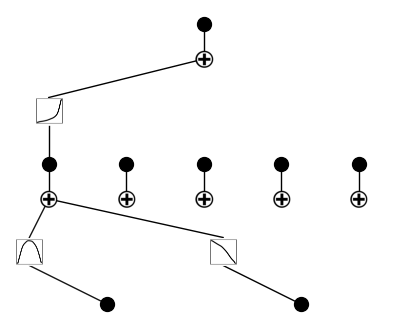

In [ ]:
seed = 171
dataset_name = 'I.6.20'
symbol, expr, f, ranges = get_feynman_dataset(dataset_name)
print(f"Dataset symbols: {symbol}")
# 2. Create Dataset
# n_var is the number of input variables (len(ranges))
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=500, test_num=500, seed=seed)


# 3. Initialize KAN Model with coarse grid G=3
width = [len(ranges), 5, 1]
model = KAN(width=width, grid=3, k=3, seed=seed)

# 4. Train with Grid Extension (Paper Protocol)
# "increasing number of grid points every 200 steps to cover G = {3,5,10,20,50,100,200}"
grids = [3, 5, 10, 20]
steps_per_grid = 100
print(f"Starting training with grids: {grids}")
for i, g in enumerate(grids):
    if i > 0:
        # Refine the grid to the new size 'g'
        # This returns a NEW model with finer grid, initialized from the old one
        model = model.refine(g)
    
    print(f"Training grid: {g}")
    # Train for 200 steps
    results = model.fit(dataset, opt="LBFGS", steps=steps_per_grid, lamb=1e-3)
    
    print(f"Grid: {g}, Train RMSE: {results['train_loss'][-1]:.4e}, Test RMSE: {results['test_loss'][-1]:.4e}")
# 5. Plot final model
model.plot()
plt.show()

In [ ]:
model = model.prune

In [ ]:
model.plot()

{'test_loss': 0.02115623466670513, 'n_edge': 15, 'n_grid': 20}

In [ ]:
model.evaluate(dataset)

{'test_loss': 0.30853909254074097, 'n_edge': 6, 'n_grid': 20}

In [ ]:
model.fit(dataset, opt="LBFGS", steps=100)

| train_loss: 8.41e-02 | test_loss: 1.20e-01 | reg: 8.30e+00 | : 100%|█| 100/100 [00:32<00:00,  3.10

saving model version 0.11


{'train_loss': [array(0.2881325, dtype=float32),
  array(0.28688082, dtype=float32),
  array(0.2862275, dtype=float32),
  array(0.28579137, dtype=float32),
  array(0.2855391, dtype=float32),
  array(0.25307894, dtype=float32),
  array(0.24682917, dtype=float32),
  array(0.23696461, dtype=float32),
  array(0.22966692, dtype=float32),
  array(0.22567141, dtype=float32),
  array(0.16169867, dtype=float32),
  array(0.14484866, dtype=float32),
  array(0.13796763, dtype=float32),
  array(0.1341562, dtype=float32),
  array(0.125745, dtype=float32),
  array(0.13489938, dtype=float32),
  array(0.12330223, dtype=float32),
  array(0.11722546, dtype=float32),
  array(0.11517485, dtype=float32),
  array(0.11190354, dtype=float32),
  array(0.11484651, dtype=float32),
  array(0.11253449, dtype=float32),
  array(0.10906837, dtype=float32),
  array(0.10679381, dtype=float32),
  array(0.10518655, dtype=float32),
  array(0.10493144, dtype=float32),
  array(0.10341242, dtype=float32),
  array(0.10283092, 

### Test MLP model

In [ ]:
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=1000, test_num=1000, seed=30)

In [ ]:
model = new_MLP(width=[2, 5, 5, 5, 5, 1], act='tanh', seed=30, device='cpu')
results = model.fit(dataset, steps=600, opt="LBFGS")

| train_loss: 6.31e-04 | test_loss: 6.54e-04 | reg: 7.54e+01 | : 100%|█| 600/600 [00:27<00:00, 21.91


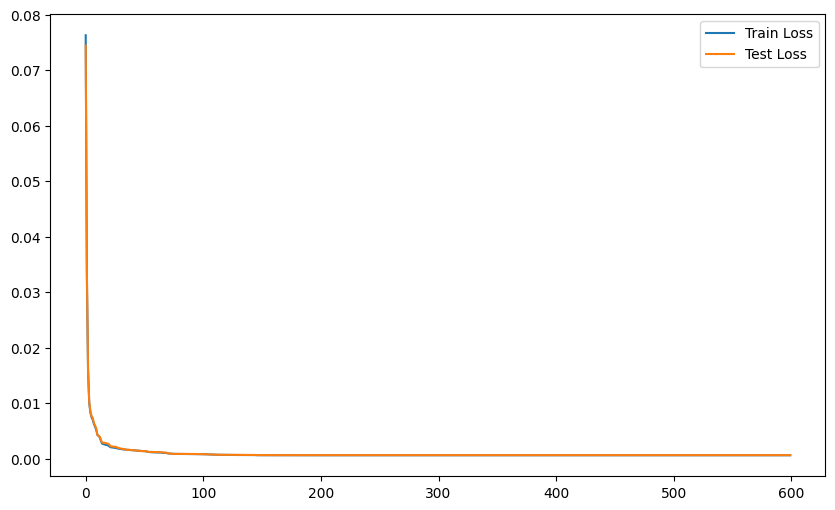

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(results['train_loss'], label='Train Loss')
plt.plot(results['test_loss'], label='Test Loss')
plt.legend()
plt.show()

## Experiment Functions

In [6]:
def run_kan_feynman(dataset: str,
                          shape: list[int],
                          samples: int, # samples for both train and test (separated) sets
                          start_grid: int = 3,
                          k: int = 3,
                          device='cuda' if torch.cuda.is_available() else 'cpu',
                          seed:int=42,
                          grids=[3, 5, 10, 20, 50, 100, 200],
                          steps_per_grid=200,
                          plot_model=False,
                          prune=False,
                          prune_threshold=1e-2,
                          steps_after_prune=200,
                          lamb=0.00,
                          opt="LBFGS",
                          **kwargs):
    """
    Train a KAN model on a Feynman physics dataset using grid refinement.
    
    Args:
        dataset: Name of the Feynman dataset (e.g., 'I.6.20')
        shape: Network architecture as list [input_dim, hidden_dims..., output_dim]
        samples: Number of training and test samples
        start_grid: Initial grid size for spline approximation
        k: Order of B-spline basis functions
        device: 'cpu' or 'cuda'
        seed: Random seed for reproducibility
        grids: List of grid sizes for progressive refinement
        steps_per_grid: Training steps per grid size
        plot_model: Whether to plot the final model
        prune: Whether to prune insignificant connections
        prune_threshold: Threshold for pruning (if prune=True)
        steps_after_prune: Additional training steps after pruning
        lamb: Regularization parameter for sparsity
        opt: Optimizer to use ('LBFGS' or 'Adam')
    
    Returns:
        model: Trained KAN model
        per_grid_results: Dictionary of training results per grid size
        best_test_rmse: Best test RMSE achieved
    """
    
    assert device in ['cpu', 'cuda']
    try:
        torch.manual_seed(seed)
    except Exception as e:
        print('Warning: could not set torch.manual_seed')
    
    try:
        symbol, expr, f, ranges = get_feynman_dataset(dataset)
    except ValueError:
        raise ValueError("Invalid dataset name")

    dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=samples, test_num=samples, seed=seed)


    dataset['train_input'] = dataset['train_input'].to(device)
    dataset['train_label'] = dataset['train_label'].to(device)
    dataset['test_input'] = dataset['test_input'].to(device)
    dataset['test_label'] = dataset['test_label'].to(device)

    # assert shape[0] == len(ranges), "Input dimension does not match number of variables in dataset"
    # print(shape)
    if not shape[-1] == 1:
        print(f"Warning: Output dimension {shape[-1]} is not 1. Forcing condition.")
        shape[-1] = 1
    if not shape[0] == len(ranges):
        print(f"Warning: Input dimension {shape[0]} does not match number of variables in dataset {len(ranges)}. Forcing condition.")
        shape[0] = len(ranges)

    # Create a copy of shape before passing to KAN to avoid mutation
    # KAN's __init__ converts [2,5,1] to [[2,0],[5,0],[1,0]] in-place
    model = KAN(width=shape.copy(), grid=start_grid, k=k, seed=seed).to(device)

    per_grid_results = {}

    for i, g in enumerate(grids):
        if i > 0: #skip first iteration
            model = model.refine(g)
        
        print(f"Training grid: {g}")
        results = model.fit(dataset, opt=opt, steps=steps_per_grid, lamb=lamb) #, verbose=verbose)
        per_grid_results[g] = results

    if prune:
        print("Pruning model...")
        model = model.prune(prune_threshold)
        # Disable grid updates after pruning to avoid numerical instability with smaller network
        results = model.fit(dataset, opt=opt, steps=steps_after_prune, lamb=0.0, update_grid=False) #, verbose=verbose)
        per_grid_results['prunning'] = results
        

    if plot_model:
        model.plot()
        plt.show()

    best_test_rmse = min(per_grid_results.values(), key=lambda x: x['test_loss'][-1])['test_loss'][-1]
    
    return model, per_grid_results, best_test_rmse

In [ ]:
def sweep_kan_feynman(dataset:str, width: int=5, depths=[2,3,4,5,6], seeds: list[int] = [42, 171, 3], lambs: list[float] = [0.0], **kwargs):
    """
    Sweep over different KAN architectures with varying depths, seeds, and regularization.
    
    Args:
        dataset: Name of the Feynman dataset
        width: Width of hidden layers
        depths: List of network depths to test (includes input and output layers)
        seeds: List of random seeds for multiple runs
        lambs: List of L1 regularization coefficients
        **kwargs: Additional arguments passed to run_kan_feynman
    
    Returns:
        all_results: Nested dictionary of results [depth][lamb][seed]
        best_test_rmse: Best test RMSE across all configurations
    """

    all_results = {}
    best_test_rmse = float('inf')
    
    # Get dataset info to determine input dimension
    try:
        symbol, expr, f, ranges = get_feynman_dataset(dataset)
        n_inputs = len(ranges)
    except Exception as e:
        raise ValueError(f"Could not load dataset {dataset}")

    for depth in depths:
        all_results[depth] = {}
        for lamb in lambs:
            all_results[depth][lamb] = {}
            for seed in seeds:
                all_results[depth][lamb][seed] = {}
                # Build shape with correct input dimension and output dimension of 1
                # depth includes input and output layers, so we need depth-2 hidden layers
                if depth == 1:
                    shape = [n_inputs, 1]
                else:
                    shape = [n_inputs] + [width for _ in range(depth - 1)] + [1]


                model, per_grid_results, test_rmse = run_kan_feynman(dataset=dataset, shape=shape, lamb=lamb, seed=seed, **kwargs)
                    
                all_results[depth][lamb][seed] = {
                    'model': model,
                    'per_grid_results': per_grid_results,
                    'test_rmse': test_rmse
                }

                if test_rmse < best_test_rmse:
                    best_test_rmse = test_rmse

    return all_results, best_test_rmse

In [8]:
def feynman_human_kan_experiment(dataset: str, shape: list[int], seeds: int| list[int] = [42, 171, 3], samples: int = 1000, **kwargs):
    """
    Train a KAN with manually specified architecture on a Feynman dataset.
    
    Args:
        dataset: Name of the Feynman dataset
        shape: Manual network architecture specification
        seeds: Random seed(s) for multiple runs
        samples: Number of training/test samples
        **kwargs: Additional arguments passed to run_kan_feynman
    
    Returns:
        best_test_rmse: Best RMSE across all seeds
        all_results: List of results for each seed
    """
    all_results = []
    for seed in seeds:
        results = run_kan_feynman(dataset=dataset,
                                seed=seed,
                                samples=samples,
                                shape=shape,
                                **kwargs)
        all_results.append(results)
    
    best_test_rmse = min([res[2] for res in all_results])

    print('==='*20)
    print(f'Best Test RMSE for human-constructed KAN on dataset {dataset}: {best_test_rmse:.4e}')

    return best_test_rmse, all_results
    

def feynman_not_pruned_kan_experiment(dataset: str, seeds: int | list[int], samples=1000, **kwargs):
    """
    Train KAN models without pruning across multiple architectures.
    
    Args:
        dataset: Name of the Feynman dataset
        seeds: Random seed(s) for multiple runs
        samples: Number of training/test samples
        **kwargs: Additional arguments passed to sweep_kan_feynman
    
    Returns:
        best_test_rmse: Best RMSE across all configurations
        results: Nested dictionary of all results
    """

    results = sweep_kan_feynman(dataset=dataset,
                                seeds=seeds,
                                samples=samples,
                                **kwargs)

    # print('==='*20)
    # print(f'Best Test RMSE for not pruned KAN on dataset {dataset}: {results[1]:.4e}')
    best_test_rmse = results[1]

    return best_test_rmse, results


def feynman_pruned_kan_experiment(dataset: str, seeds: int|list[int] = [42, 171, 3], samples: int = 1000, steps_after_prune: int = 100,  lambs=[1e-2, 1e-3], **kwargs):
    """
    Train KAN models with pruning to discover compact network structures.
    
    Args:
        dataset: Name of the Feynman dataset
        seeds: Random seed(s) for multiple runs
        samples: Number of training/test samples
        steps_after_prune: Training steps after pruning
        lambs: L1 regularization coefficients for sparsity
        **kwargs: Additional arguments passed to sweep_kan_feynman
    
    Returns:
        smallest_shape: Most compact shape with RMSE < 1e-2
        shape_best_loss: Architecture with best overall RMSE
        best_test_rmse: Best RMSE across all configurations
        results: Nested dictionary of all results
    """
    results, best_test_rmse = sweep_kan_feynman(dataset=dataset,
                                seeds=seeds,
                                samples=samples,
                                prune=True,
                                prune_threshold=0.01,
                                steps_after_prune=steps_after_prune,
                                lambs=lambs,
                                **kwargs)
    

    # get smallest shape with loss < 1e-2
    # get shape of best loss

    smallest_shape = None
    smallest_params = float('inf')
    shape_best_loss = None
    smallest_loss = float('inf')

    for depth, v in results.items():
        for lamb, vv in v.items():
            for seed, res in vv.items():
                test_rmse = res['test_rmse']
                model = res['model']
                shape = [p[0] if isinstance(p, list) else p for p in model.width]
                num_params = sum(p.numel() for p in model.parameters())


                if test_rmse < 1e-2:
                    if smallest_shape is None or sum(shape) < sum(smallest_shape):
                        if num_params > smallest_params and smallest_shape is not None:
                            print(f"Warning: Found smaller shape {shape} with more parameters {num_params} > {smallest_params}. Still taking smallest shape though.")
                        smallest_shape = shape
                        smallest_params = num_params

                if test_rmse < smallest_loss:
                    smallest_loss = test_rmse
                    shape_best_loss = shape


    
    # If no model achieved RMSE < 1e-2, print warning
    if smallest_shape is None:

        print(f"⚠️ WARNING: No model achieved RMSE < 1e-2 for dataset {dataset}")


    return smallest_shape, shape_best_loss, best_test_rmse, results

In [9]:
def feynman_mlp_experiment(dataset: str, seeds: int|list[int] = [42, 171, 3], samples: int = 1000, device='cuda' if torch.cuda.is_available() else 'cpu',
                           activations=['silu', 'relu', 'tanh'], depths = [2,3,4,5,6], steps=1400, lr=1, **kwargs):
    """
    Train standard MLP models on Feynman dataset for baseline comparison.
    
    Args:
        dataset: Name of the Feynman dataset
        seeds: Random seed(s) for multiple runs
        samples: Number of training/test samples
        device: 'cpu' or 'cuda'
        activations: List of activation functions to test
        depths: List of network depths to test
        steps: Total training steps
        lr: Learning rate
        **kwargs: Additional arguments (unused, for consistency)
    
    Returns:
        all_results: Nested dictionary of results [seed][depth][activation]
        best_test_rmse: Best RMSE across all configurations
    """

    assert device in ['cpu', 'cuda']

    all_results = {}
    best_test_rmse = float('inf')

    try:
        symbol, expr, f, ranges = get_feynman_dataset(dataset)
    except ValueError:
        raise ValueError("Invalid dataset name")
    
    for seed in seeds:
        try:
            torch.manual_seed(seed)
        except Exception as e:
            print(f"Warning: could not set seed due to error: {e}")

        dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=samples, test_num=samples, seed=seed)
        dataset['train_input'] = dataset['train_input'].to(device)
        dataset['train_label'] = dataset['train_label'].to(device)
        dataset['test_input'] = dataset['test_input'].to(device)
        dataset['test_label'] = dataset['test_label'].to(device)

        all_results[seed] = {}
        
        for depth in depths:
            shape = [len(ranges)] + [5 for _ in range(depth-1)] + [1]

            all_results[seed][depth] = {}

            for act in activations:
                model = MLP(width=shape, act=act, seed=seed, device=device)

                results = model.fit(dataset=dataset, steps=steps, opt="LBFGS", lr=lr)
                all_results[seed][depth][act] = results

                test_rmse = min(results['test_loss'])

                if test_rmse < best_test_rmse:
                    best_test_rmse = test_rmse
                
    return all_results, best_test_rmse

In [10]:
def full_feynman_experiment(dataset: str, shape_human: list[int], seeds: list[int] = [42, 171, 3], samples: int = 1000, skip = [], **kwargs):
    """
    Run comprehensive comparison of KAN variants and MLP on a Feynman dataset.
    
    This function orchestrates four different experiments:
    - Human-designed KAN architecture
    - Unpruned KAN (architecture search)
    - Pruned KAN (discover compact structures)
    - Standard MLP baseline
    
    Args:
        dataset: Name of the Feynman dataset
        shape_human: Manually specified KAN architecture
        seeds: Random seeds for multiple runs
        samples: Number of training/test samples
        skip: List of experiments to skip ['human', 'unpruned', 'pruned', 'mlp']
        **kwargs: Additional arguments passed to sub-experiments
    
    Returns:
        full_results: Dictionary containing results from all experiments
    """

    pruned_smallest_shape, pruned_shape_best_loss, pruned_best_rmse = None, None, None
    h_best_test_rmse, not_pruned_best_rmse, mlp_best_rmse = None, None, None

    if 'human' not in skip:
        print('Running Human-constructed KAN Experiment...')
        h_best_test_rmse, h_results = feynman_human_kan_experiment(dataset=dataset, shape=shape_human, seeds=seeds, samples=samples, **kwargs)
        print(f'Best Test RMSE for human-constructed KAN on dataset {dataset}: {h_best_test_rmse:.4e}')

    if 'unpruned' not in skip:
        print('--------------------------------') 
        print('Running Not Pruned KAN Experiment...')
        not_pruned_best_rmse, not_pruned_results = feynman_not_pruned_kan_experiment(dataset=dataset, seeds=seeds, samples=samples, **kwargs)
        print(f'Best Test RMSE for not pruned KAN on dataset {dataset}: {not_pruned_best_rmse:.4e}')

    if 'pruned' not in skip:
        print('--------------------------------') 
        print('Running Pruned KAN Experiment...')
        pruned_smallest_shape, pruned_shape_best_loss, pruned_best_rmse, pruned_results = feynman_pruned_kan_experiment(dataset=dataset, seeds=seeds, samples=samples, **kwargs)
        print(f'Pruned KAN Smallest Shape: {pruned_smallest_shape}, ')
        print(f'Pruned KAN lowest loss Shape: {pruned_shape_best_loss}, ')
        print(f'Pruned KAN lowest loss: {pruned_best_rmse:.4e}')

    if 'mlp' not in skip:
        print('--------------------------------') 
        print('Running MLP Experiment...')
        mlp_results, mlp_best_rmse = feynman_mlp_experiment(dataset=dataset, seeds=seeds, samples=samples, **kwargs)
        print(f'MLP lowest loss: {mlp_best_rmse:.4e}')

    print('--------------------------------') 
    print('==='*40)
    print('==='*40)
    print(f'Final Results for dataset {dataset}:')

    if 'pruned' not in skip:
        print(f'Pruned KAN Smallest Shape: {pruned_smallest_shape}, ')
        print(f'Pruned KAN lowest loss Shape: {pruned_shape_best_loss}, ')
        print(f'Pruned KAN lowest loss: {pruned_best_rmse:.4e}')
    if 'human' not in skip:
        print(f'Human-constructed KAN loss: {h_best_test_rmse:.4e}')
    if 'unpruned' not in skip:
        print(f'UnPruned KAN lowest loss: {not_pruned_best_rmse:.4e}')
    if 'mlp' not in skip:
        print(f'MLP lowest loss: {mlp_best_rmse:.4e}')
    print('==='*40)
    print('==='*40)

    # save results
    full_results = {
        'human': {
            'best_rmse': h_best_test_rmse,
            'results': h_results
        } if 'human' not in skip else None,
        'not_pruned': {
            'best_rmse': not_pruned_best_rmse,
            'results': not_pruned_results
        } if 'unpruned' not in skip else None,
        'pruned': {
            'smallest_shape': pruned_smallest_shape,
            'shape_best_loss': pruned_shape_best_loss,
            'best_rmse': pruned_best_rmse,
            'results': pruned_results
        } if 'pruned' not in skip else None,
        'mlp': {
            'best_rmse': mlp_best_rmse,
            'results': mlp_results
        } if 'mlp' not in skip else None    
    }

    return full_results

## Experiments

In [ ]:
results_I_6_20 = full_feynman_experiment(dataset='I.6.20', shape_human=[2, 5, 1], seeds=[3, 42, 171]) 


Running Pruned KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 5.12e-02 | test_loss: 5.01e-02 | reg: 2.10e+00 | : 100%|█| 200/200 [00:08<00:00, 23.56


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 5.09e-02 | test_loss: 5.05e-02 | reg: 2.10e+00 | : 100%|█| 200/200 [00:06<00:00, 29.97


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 5.02e-02 | test_loss: 5.17e-02 | reg: 2.11e+00 | : 100%|█| 200/200 [00:06<00:00, 29.22


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 4.86e-02 | test_loss: 5.45e-02 | reg: 2.12e+00 | : 100%|█| 200/200 [00:08<00:00, 23.70


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 4.76e-02 | test_loss: 5.47e-02 | reg: 2.13e+00 | : 100%|█| 200/200 [00:08<00:00, 23.67


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 4.51e-02 | test_loss: 5.59e-02 | reg: 2.16e+00 | : 100%|█| 200/200 [00:10<00:00, 19.26


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: 3.85e-02 | test_loss: 6.47e-02 | reg: 2.21e+00 | : 100%|█| 200/200 [00:14<00:00, 14.23


saving model version 0.13
Pruning model...
saving model version 0.14


| train_loss: 3.85e-02 | test_loss: 6.47e-02 | reg: 2.21e+00 | : 100%|█| 100/100 [00:03<00:00, 25.33


saving model version 0.15
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 5.12e-02 | test_loss: 5.01e-02 | reg: 2.10e+00 | : 100%|█| 200/200 [00:07<00:00, 25.84


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 5.09e-02 | test_loss: 5.05e-02 | reg: 2.10e+00 | : 100%|█| 200/200 [00:07<00:00, 28.12


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 5.02e-02 | test_loss: 5.17e-02 | reg: 2.11e+00 | : 100%|█| 200/200 [00:05<00:00, 33.65


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 4.86e-02 | test_loss: 5.45e-02 | reg: 2.12e+00 | : 100%|█| 200/200 [00:08<00:00, 24.11


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 4.76e-02 | test_loss: 5.47e-02 | reg: 2.13e+00 | : 100%|█| 200/200 [00:10<00:00, 18.88


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 4.51e-02 | test_loss: 5.59e-02 | reg: 2.16e+00 | : 100%|█| 200/200 [00:10<00:00, 18.63


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: 3.85e-02 | test_loss: 6.47e-02 | reg: 2.21e+00 | : 100%|█| 200/200 [00:13<00:00, 14.65


saving model version 0.13
Pruning model...
saving model version 0.14


| train_loss: 3.85e-02 | test_loss: 6.47e-02 | reg: 2.21e+00 | : 100%|█| 100/100 [00:03<00:00, 27.22


saving model version 0.15
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 5.12e-02 | test_loss: 5.01e-02 | reg: 2.10e+00 | : 100%|█| 200/200 [00:08<00:00, 23.42


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 5.09e-02 | test_loss: 5.05e-02 | reg: 2.10e+00 | : 100%|█| 200/200 [00:07<00:00, 27.54


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 5.02e-02 | test_loss: 5.17e-02 | reg: 2.11e+00 | : 100%|█| 200/200 [00:06<00:00, 32.47


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 4.86e-02 | test_loss: 5.45e-02 | reg: 2.12e+00 | : 100%|█| 200/200 [00:08<00:00, 23.55


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 4.76e-02 | test_loss: 5.47e-02 | reg: 2.13e+00 | : 100%|█| 200/200 [00:08<00:00, 22.24


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 4.51e-02 | test_loss: 5.59e-02 | reg: 2.16e+00 | : 100%|█| 200/200 [00:10<00:00, 19.48


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: 3.85e-02 | test_loss: 6.47e-02 | reg: 2.21e+00 | : 100%|█| 200/200 [00:14<00:00, 14.15


saving model version 0.13
Pruning model...
saving model version 0.14


| train_loss: 3.85e-02 | test_loss: 6.47e-02 | reg: 2.21e+00 | : 100%|█| 100/100 [00:03<00:00, 29.93


saving model version 0.15

Final Results for dataset I.6.20:
Pruned KAN Smallest Shape: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 
Pruned KAN lowest loss Shape: [2, 1], 
Pruned KAN lowest loss: 5.0074e-02


In [ ]:
results_I_6_20b = full_feynman_experiment(dataset='I.6.20b', shape_human=[3,2,2,1,1], seeds=[171], skip=['mlp', 'pruned'])

--------------------------------
Running MLP Experiment...


| train_loss: 3.12e-02 | test_loss: 3.18e-02 | reg: 4.33e+01 | : 100%|█| 1400/1400 [00:42<00:00, 32.
| train_loss: 5.44e-02 | test_loss: 5.65e-02 | reg: 1.92e+01 | : 100%|█| 1400/1400 [00:48<00:00, 28.
| train_loss: 1.44e-02 | test_loss: 1.50e-02 | reg: 3.57e+01 | : 100%|█| 1400/1400 [00:47<00:00, 29.
| train_loss: 2.37e-03 | test_loss: 2.65e-03 | reg: 6.90e+01 | : 100%|█| 1400/1400 [01:08<00:00, 20.
| train_loss: 2.64e-02 | test_loss: 2.66e-02 | reg: 3.67e+01 | : 100%|█| 1400/1400 [01:03<00:00, 21.
| train_loss: 7.46e-04 | test_loss: 9.05e-04 | reg: 6.56e+01 | : 100%|█| 1400/1400 [01:10<00:00, 19.
| train_loss: 1.05e-03 | test_loss: 1.13e-03 | reg: 8.73e+01 | : 100%|█| 1400/1400 [01:14<00:00, 18.
| train_loss: 1.05e-02 | test_loss: 1.08e-02 | reg: 5.54e+01 | : 100%|█| 1400/1400 [01:06<00:00, 21.
| train_loss: 9.30e-04 | test_loss: 1.08e-03 | reg: 6.84e+01 | : 100%|█| 1400/1400 [00:53<00:00, 26.
| train_loss: 1.39e-03 | test_loss: 1.65e-03 | reg: 9.67e+01 | : 100%|█| 1400/1400 [01:17<0

MLP lowest loss: 5.7291e-04
--------------------------------
Final Results for dataset I.6.20b:
MLP lowest loss: 5.7291e-04


In [10]:
results_I_9_18 = full_feynman_experiment(dataset='I.9.18', shape_human=[6,4,2,1,1], seeds=[171], skip=['pruned', 'human', 'unpruned'], depths=[3,4])

--------------------------------
Running MLP Experiment...


| train_loss: 2.63e-03 | test_loss: 3.68e-03 | reg: 5.04e+01 | : 100%|█| 1400/1400 [00:54<00:00, 25.
| train_loss: 1.63e-02 | test_loss: 1.73e-02 | reg: 3.59e+01 | : 100%|█| 1400/1400 [00:55<00:00, 25.
| train_loss: 9.89e-04 | test_loss: 1.35e-03 | reg: 4.09e+01 | : 100%|█| 1400/1400 [00:55<00:00, 25.
| train_loss: 1.53e-03 | test_loss: 1.97e-03 | reg: 9.20e+01 | : 100%|█| 1400/1400 [01:22<00:00, 16.
| train_loss: 1.26e-02 | test_loss: 1.29e-02 | reg: 5.47e+01 | : 100%|█| 1400/1400 [01:08<00:00, 20.
| train_loss: 9.59e-04 | test_loss: 1.22e-03 | reg: 5.54e+01 | : 100%|█| 1400/1400 [01:03<00:00, 22.

MLP lowest loss: 1.2142e-03
--------------------------------
Final Results for dataset I.9.18:
MLP lowest loss: 1.2142e-03


In [11]:
results_I_12_11 = full_feynman_experiment(dataset='I.12.11', shape_human=[2,2,2,1], seeds=[171], skip=['pruned'], depths=[2,3])

Running Human-constructed KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.12e-01 | test_loss: 1.58e-01 | reg: 1.42e+01 | : 100%|█| 200/200 [01:01<00:00,  3.24


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.33it/s]


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.31it/s]


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:59<00:00,  3.34it/s]


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.33it/s]


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.31it/s]


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.33it/s]


saving model version 0.13
Best Test RMSE for human-constructed KAN on dataset I.12.11: 1.5823e-01
Best Test RMSE for human-constructed KAN on dataset I.12.11: 1.5823e-01
--------------------------------
Running Not Pruned KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 5.98e-02 | test_loss: 7.78e-02 | reg: 2.37e+01 | : 100%|█| 200/200 [00:46<00:00,  4.30


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 4.23e-02 | test_loss: 5.85e-02 | reg: 3.11e+01 | : 100%|█| 200/200 [00:46<00:00,  4.28


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:42<00:00,  4.67it/s]


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:42<00:00,  4.67it/s]


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:43<00:00,  4.62it/s]


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:42<00:00,  4.66it/s]


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:44<00:00,  4.46it/s]


saving model version 0.13
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.50e-02 | test_loss: 2.42e-02 | reg: 3.16e+01 | : 100%|█| 200/200 [01:01<00:00,  3.24


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 7.22e-03 | test_loss: 1.47e-02 | reg: 3.38e+01 | : 100%|█| 200/200 [01:01<00:00,  3.27


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 3.67e-03 | test_loss: 1.26e-02 | reg: 3.40e+01 | : 100%|█| 200/200 [01:01<00:00,  3.25


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 1.73e-03 | test_loss: 1.24e-02 | reg: 3.40e+01 | : 100%|█| 200/200 [00:43<00:00,  4.58


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 7.37e-05 | test_loss: 1.39e-02 | reg: 3.40e+01 | : 100%|█| 200/200 [00:37<00:00,  5.37


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.31it/s]


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:04<00:00,  3.09it/s]


saving model version 0.13
Best Test RMSE for not pruned KAN on dataset I.12.11: 1.2445e-02
--------------------------------
Running MLP Experiment...


| train_loss: 1.20e-01 | test_loss: 1.41e-01 | reg: 3.92e+01 | : 100%|█| 1400/1400 [00:44<00:00, 31.
| train_loss: 1.29e-01 | test_loss: 1.53e-01 | reg: 2.34e+01 | : 100%|█| 1400/1400 [00:48<00:00, 28.
| train_loss: 1.07e-01 | test_loss: 1.23e-01 | reg: 3.92e+01 | : 100%|█| 1400/1400 [01:03<00:00, 21.
| train_loss: 9.91e-02 | test_loss: 1.19e-01 | reg: 6.83e+01 | : 100%|█| 1400/1400 [01:00<00:00, 23.
| train_loss: 2.06e-01 | test_loss: 2.25e-01 | reg: 4.10e+01 | : 100%|█| 1400/1400 [00:55<00:00, 25.
| train_loss: 8.31e-02 | test_loss: 9.68e-02 | reg: 6.24e+01 | : 100%|█| 1400/1400 [01:03<00:00, 22.

MLP lowest loss: 9.6633e-02
--------------------------------
Final Results for dataset I.12.11:
Human-constructed KAN loss: 1.5823e-01
UnPruned KAN lowest loss: 1.2445e-02
MLP lowest loss: 9.6633e-02


In [12]:
results_I_13_12 = full_feynman_experiment(dataset='I.13.12', shape_human=[2,2,1], seeds=[171], skip=['pruned'], depths=[2,3])

Running Human-constructed KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


description:   0%|                                                          | 0/200 [00:00<?, ?it/s]

| train_loss: 1.57e-03 | test_loss: 2.47e-03 | reg: 1.28e+01 | : 100%|█| 200/200 [00:42<00:00,  4.66


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 6.46e-04 | test_loss: 1.02e-03 | reg: 1.30e+01 | : 100%|█| 200/200 [00:40<00:00,  4.89


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 4.35e-04 | test_loss: 1.98e-03 | reg: 1.29e+01 | : 100%|█| 200/200 [00:21<00:00,  9.14


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 1.71e-04 | test_loss: 3.92e-03 | reg: 1.26e+01 | : 100%|█| 200/200 [00:20<00:00,  9.57


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 9.46e-05 | test_loss: 1.13e-01 | reg: 1.22e+01 | : 100%|█| 200/200 [00:24<00:00,  8.01


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 1.18e-04 | test_loss: 1.36e-01 | reg: 1.20e+01 | : 100%|█| 200/200 [00:24<00:00,  8.13


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: 1.78e-05 | test_loss: 1.36e-01 | reg: 1.20e+01 | : 100%|█| 200/200 [00:16<00:00, 12.09


saving model version 0.13
Best Test RMSE for human-constructed KAN on dataset I.13.12: 1.0249e-03
Best Test RMSE for human-constructed KAN on dataset I.13.12: 1.0249e-03
--------------------------------
Running Not Pruned KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 9.47e-04 | test_loss: 1.72e-03 | reg: 1.96e+01 | : 100%|█| 200/200 [00:45<00:00,  4.42


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:43<00:00,  4.63it/s]


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:42<00:00,  4.70it/s]


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:43<00:00,  4.63it/s]


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:43<00:00,  4.61it/s]


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:42<00:00,  4.67it/s]


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:45<00:00,  4.41it/s]


saving model version 0.13
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 3.52e-04 | test_loss: 5.96e-04 | reg: 1.82e+01 | : 100%|█| 200/200 [01:00<00:00,  3.30


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.31it/s]


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.30it/s]


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.30it/s]


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.31it/s]


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.29it/s]


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:05<00:00,  3.06it/s]


saving model version 0.13
Best Test RMSE for not pruned KAN on dataset I.13.12: 5.9571e-04
--------------------------------
Running MLP Experiment...


| train_loss: 1.76e-02 | test_loss: 1.88e-02 | reg: 6.31e+01 | : 100%|█| 1400/1400 [00:57<00:00, 24.
| train_loss: 6.16e-02 | test_loss: 6.36e-02 | reg: 1.99e+01 | : 100%|█| 1400/1400 [00:50<00:00, 27.
| train_loss: 1.55e-02 | test_loss: 1.75e-02 | reg: 5.03e+01 | : 100%|█| 1400/1400 [00:49<00:00, 28.
| train_loss: 6.66e-03 | test_loss: 9.15e-03 | reg: 1.14e+02 | : 100%|█| 1400/1400 [01:23<00:00, 16.
| train_loss: 2.80e-02 | test_loss: 2.95e-02 | reg: 4.45e+01 | : 100%|█| 1400/1400 [00:36<00:00, 38.
| train_loss: 5.73e-03 | test_loss: 8.72e-03 | reg: 1.01e+02 | : 100%|█| 1400/1400 [01:25<00:00, 16.

MLP lowest loss: 8.6552e-03
--------------------------------
Final Results for dataset I.13.12:
Human-constructed KAN loss: 1.0249e-03
UnPruned KAN lowest loss: 5.9571e-04
MLP lowest loss: 8.6552e-03


In [13]:
results_I_15_3x = full_feynman_experiment(dataset='I.15.3x', shape_human=[2,2,1,1], seeds=[171], skip=['pruned'], depths=[2,3,4])

Running Human-constructed KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


description:   0%|                                                          | 0/200 [00:00<?, ?it/s]

| train_loss: 8.55e-02 | test_loss: 1.46e-01 | reg: 1.50e+01 | : 100%|█| 200/200 [00:59<00:00,  3.38


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 8.32e-02 | test_loss: 1.49e-01 | reg: 1.54e+01 | : 100%|█| 200/200 [00:38<00:00,  5.21


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 7.59e-02 | test_loss: 1.58e-01 | reg: 1.56e+01 | : 100%|█| 200/200 [00:52<00:00,  3.82


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 6.62e-02 | test_loss: 1.83e-01 | reg: 1.57e+01 | : 100%|█| 200/200 [00:47<00:00,  4.21


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 4.07e-02 | test_loss: 2.15e-01 | reg: 1.56e+01 | : 100%|█| 200/200 [01:01<00:00,  3.25


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.31it/s]


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.31it/s]


saving model version 0.13
Best Test RMSE for human-constructed KAN on dataset I.15.3x: 1.4622e-01
Best Test RMSE for human-constructed KAN on dataset I.15.3x: 1.4622e-01
--------------------------------
Running Not Pruned KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.58e-02 | test_loss: 3.46e-02 | reg: 2.22e+01 | : 100%|█| 200/200 [00:44<00:00,  4.47


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 9.26e-03 | test_loss: 2.96e-02 | reg: 2.52e+01 | : 100%|█| 200/200 [00:44<00:00,  4.45


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 5.54e-03 | test_loss: 2.55e-02 | reg: 2.67e+01 | : 100%|█| 200/200 [00:45<00:00,  4.40


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 3.28e-03 | test_loss: 2.29e-02 | reg: 2.69e+01 | : 100%|█| 200/200 [00:28<00:00,  6.97


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 4.08e-04 | test_loss: 9.06e-02 | reg: 2.70e+01 | : 100%|█| 200/200 [00:43<00:00,  4.58


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:43<00:00,  4.62it/s]


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:45<00:00,  4.44it/s]


saving model version 0.13
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 2.82e-03 | test_loss: 1.05e-02 | reg: 2.53e+01 | : 100%|█| 200/200 [01:00<00:00,  3.29


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.07e-03 | test_loss: 6.67e-03 | reg: 2.53e+01 | : 100%|█| 200/200 [00:59<00:00,  3.37


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 4.99e-04 | test_loss: 6.27e-03 | reg: 2.53e+01 | : 100%|█| 200/200 [00:34<00:00,  5.82


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 1.67e-04 | test_loss: 5.69e-03 | reg: 2.53e+01 | : 100%|█| 200/200 [00:41<00:00,  4.83


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.30it/s]


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.29it/s]


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:04<00:00,  3.10it/s]


saving model version 0.13
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 3.99e-03 | test_loss: 2.66e-02 | reg: 3.30e+01 | : 100%|█| 200/200 [01:16<00:00,  2.60


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.64e-03 | test_loss: 2.27e-02 | reg: 3.25e+01 | : 100%|█| 200/200 [01:13<00:00,  2.71


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 5.95e-04 | test_loss: 2.09e-02 | reg: 3.24e+01 | : 100%|█| 200/200 [00:53<00:00,  3.70


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 1.62e-04 | test_loss: 2.15e-02 | reg: 3.24e+01 | : 100%|█| 200/200 [00:37<00:00,  5.33


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:18<00:00,  2.55it/s]


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:18<00:00,  2.56it/s]


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:24<00:00,  2.36it/s]


saving model version 0.13
Best Test RMSE for not pruned KAN on dataset I.15.3x: 5.6870e-03
--------------------------------
Running MLP Experiment...


| train_loss: 8.06e-02 | test_loss: 1.20e-01 | reg: 6.26e+01 | : 100%|█| 1400/1400 [00:52<00:00, 26.
| train_loss: 1.77e-01 | test_loss: 2.04e-01 | reg: 2.15e+01 | : 100%|█| 1400/1400 [00:44<00:00, 31.
| train_loss: 6.91e-02 | test_loss: 1.12e-01 | reg: 7.13e+01 | : 100%|█| 1400/1400 [00:51<00:00, 27.
| train_loss: 3.48e-02 | test_loss: 9.01e-02 | reg: 1.16e+02 | : 100%|█| 1400/1400 [01:12<00:00, 19.
| train_loss: 2.76e-01 | test_loss: 2.90e-01 | reg: 4.01e+01 | : 100%|█| 1400/1400 [00:56<00:00, 24.
| train_loss: 1.99e-02 | test_loss: 4.25e-02 | reg: 1.06e+02 | : 100%|█| 1400/1400 [01:10<00:00, 19.
| train_loss: 5.79e-02 | test_loss: 1.08e-01 | reg: 1.04e+02 | : 100%|█| 1400/1400 [01:03<00:00, 22.
| train_loss: 1.36e-01 | test_loss: 1.91e-01 | reg: 8.17e+01 | : 100%|█| 1400/1400 [01:00<00:00, 23.
| train_loss: 4.92e-02 | test_loss: 1.00e-01 | reg: 1.01e+02 | : 100%|█| 1400/1400 [01:04<00:00, 21.


MLP lowest loss: 4.1932e-02
--------------------------------
Final Results for dataset I.15.3x:
Human-constructed KAN loss: 1.4622e-01
UnPruned KAN lowest loss: 5.6870e-03
MLP lowest loss: 4.1932e-02


In [14]:
results_I_16_6 = full_feynman_experiment(dataset='I.16.6', shape_human=[2,2,2,2,2,1], seeds=[171], skip=['pruned'], depths=[2,3,4])

Running Human-constructed KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


description:   0%|                                                          | 0/200 [00:00<?, ?it/s]

| train_loss: 6.35e-02 | test_loss: 6.84e-02 | reg: 1.55e+01 | : 100%|█| 200/200 [01:33<00:00,  2.15


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:34<00:00,  2.11it/s]


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:34<00:00,  2.12it/s]


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:34<00:00,  2.11it/s]


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:34<00:00,  2.11it/s]


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:36<00:00,  2.08it/s]


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:35<00:00,  2.10it/s]


saving model version 0.13
Best Test RMSE for human-constructed KAN on dataset I.16.6: 6.8381e-02
Best Test RMSE for human-constructed KAN on dataset I.16.6: 6.8381e-02
--------------------------------
Running Not Pruned KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.54e-03 | test_loss: 3.51e-03 | reg: 1.27e+01 | : 100%|█| 200/200 [00:44<00:00,  4.46


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:42<00:00,  4.66it/s]


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:43<00:00,  4.64it/s]


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:42<00:00,  4.70it/s]


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:43<00:00,  4.63it/s]


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:43<00:00,  4.61it/s]


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:45<00:00,  4.43it/s]


saving model version 0.13
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 2.28e-03 | test_loss: 3.50e-03 | reg: 2.20e+01 | : 100%|█| 200/200 [01:01<00:00,  3.24


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.10e-03 | test_loss: 2.51e-03 | reg: 2.21e+01 | : 100%|█| 200/200 [00:38<00:00,  5.21


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 4.62e-04 | test_loss: 2.22e-03 | reg: 2.22e+01 | : 100%|█| 200/200 [00:43<00:00,  4.64


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 2.72e-04 | test_loss: 1.10e-02 | reg: 2.22e+01 | : 100%|█| 200/200 [00:29<00:00,  6.82


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 4.72e-05 | test_loss: 2.91e-02 | reg: 2.22e+01 | : 100%|█| 200/200 [00:33<00:00,  5.99


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 1.49e-05 | test_loss: 5.74e-02 | reg: 2.22e+01 | : 100%|█| 200/200 [00:33<00:00,  5.92


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:05<00:00,  3.07it/s]


saving model version 0.13
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.55e-03 | test_loss: 4.77e-03 | reg: 2.69e+01 | : 100%|█| 200/200 [01:16<00:00,  2.61


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 3.71e-04 | test_loss: 2.79e-03 | reg: 2.67e+01 | : 100%|█| 200/200 [01:05<00:00,  3.07


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 1.68e-04 | test_loss: 2.45e-03 | reg: 2.66e+01 | : 100%|█| 200/200 [00:30<00:00,  6.56


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 4.69e-05 | test_loss: 2.43e-03 | reg: 2.66e+01 | : 100%|█| 200/200 [00:32<00:00,  6.07


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 2.70e-06 | test_loss: 1.07e-02 | reg: 2.66e+01 | : 100%|█| 200/200 [00:29<00:00,  6.69


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 2.66e-06 | test_loss: 1.60e-02 | reg: 2.67e+01 | : 100%|█| 200/200 [00:29<00:00,  6.76


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:25<00:00,  2.35it/s]


saving model version 0.13
Best Test RMSE for not pruned KAN on dataset I.16.6: 2.2202e-03
--------------------------------
Running MLP Experiment...


| train_loss: 1.16e-02 | test_loss: 1.18e-02 | reg: 3.27e+01 | : 100%|█| 1400/1400 [00:48<00:00, 29.
| train_loss: 2.37e-01 | test_loss: 2.30e-01 | reg: 1.58e+01 | : 100%|█| 1400/1400 [00:32<00:00, 43.
| train_loss: 8.87e-03 | test_loss: 8.99e-03 | reg: 3.63e+01 | : 100%|█| 1400/1400 [00:53<00:00, 25.
| train_loss: 3.97e-03 | test_loss: 3.96e-03 | reg: 5.96e+01 | : 100%|█| 1400/1400 [00:56<00:00, 24.
| train_loss: 1.92e-01 | test_loss: 1.90e-01 | reg: 3.10e+01 | : 100%|█| 1400/1400 [00:32<00:00, 42.
| train_loss: 9.27e-03 | test_loss: 1.03e-02 | reg: 4.97e+01 | : 100%|█| 1400/1400 [00:45<00:00, 30.
| train_loss: 3.78e-03 | test_loss: 4.43e-03 | reg: 7.14e+01 | : 100%|█| 1400/1400 [01:02<00:00, 22.
| train_loss: 1.91e-01 | test_loss: 1.90e-01 | reg: 4.49e+01 | : 100%|█| 1400/1400 [01:10<00:00, 19.
| train_loss: 3.60e-03 | test_loss: 3.49e-03 | reg: 8.02e+01 | : 100%|█| 1400/1400 [01:03<00:00, 22.

MLP lowest loss: 3.4774e-03
--------------------------------
Final Results for dataset I.16.6:
Human-constructed KAN loss: 6.8381e-02
UnPruned KAN lowest loss: 2.2202e-03
MLP lowest loss: 3.4774e-03


In [15]:
results_I_18_4 = full_feynman_experiment(dataset='I.18.4', shape_human=[2,2,2,1,1], seeds=[171], skip=['pruned'], depths=[2, 3, 4])

Running Human-constructed KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


description:   0%|                                                          | 0/200 [00:00<?, ?it/s]

| train_loss: 1.18e-01 | test_loss: 1.35e-01 | reg: 1.43e+01 | : 100%|█| 200/200 [01:18<00:00,  2.56


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 9.54e-02 | test_loss: 1.27e-01 | reg: 1.53e+01 | : 100%|█| 200/200 [01:16<00:00,  2.62


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:17<00:00,  2.59it/s]


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:16<00:00,  2.61it/s]


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:17<00:00,  2.58it/s]


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:17<00:00,  2.58it/s]


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:17<00:00,  2.59it/s]


saving model version 0.13
Best Test RMSE for human-constructed KAN on dataset I.18.4: 1.2739e-01
Best Test RMSE for human-constructed KAN on dataset I.18.4: 1.2739e-01
--------------------------------
Running Not Pruned KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 5.00e-03 | test_loss: 5.76e-03 | reg: 1.53e+01 | : 100%|█| 200/200 [00:45<00:00,  4.41


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 2.69e-03 | test_loss: 3.05e-03 | reg: 1.56e+01 | : 100%|█| 200/200 [00:35<00:00,  5.64


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 5.16e-04 | test_loss: 8.88e-04 | reg: 1.56e+01 | : 100%|█| 200/200 [00:32<00:00,  6.21


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 3.43e-04 | test_loss: 2.60e-03 | reg: 1.56e+01 | : 100%|█| 200/200 [00:20<00:00,  9.56


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 2.08e-04 | test_loss: 2.37e-02 | reg: 1.56e+01 | : 100%|█| 200/200 [00:25<00:00,  7.89


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 6.88e-05 | test_loss: 5.06e-02 | reg: 1.56e+01 | : 100%|█| 200/200 [00:25<00:00,  7.89


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:44<00:00,  4.45it/s]


saving model version 0.13
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 4.51e-03 | test_loss: 5.24e-03 | reg: 2.71e+01 | : 100%|█| 200/200 [01:01<00:00,  3.26


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:59<00:00,  3.34it/s]


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.33it/s]


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.32it/s]


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:00<00:00,  3.30it/s]


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:01<00:00,  3.27it/s]


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:04<00:00,  3.10it/s]


saving model version 0.13
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 3.57e-03 | test_loss: 5.29e-03 | reg: 3.37e+01 | : 100%|█| 200/200 [01:17<00:00,  2.60


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.80e-03 | test_loss: 3.85e-03 | reg: 3.37e+01 | : 100%|█| 200/200 [01:03<00:00,  3.15


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 7.62e-04 | test_loss: 2.55e-03 | reg: 3.37e+01 | : 100%|█| 200/200 [00:42<00:00,  4.71


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 3.61e-04 | test_loss: 2.48e-03 | reg: 3.37e+01 | : 100%|█| 200/200 [00:31<00:00,  6.44


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 6.38e-05 | test_loss: 1.52e-02 | reg: 3.37e+01 | : 100%|█| 200/200 [00:33<00:00,  6.01


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:18<00:00,  2.54it/s]


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [01:24<00:00,  2.37it/s]


saving model version 0.13
Best Test RMSE for not pruned KAN on dataset I.18.4: 8.8796e-04
--------------------------------
Running MLP Experiment...


| train_loss: 1.06e-01 | test_loss: 1.07e-01 | reg: 5.65e+01 | : 100%|█| 1400/1400 [00:39<00:00, 35.
| train_loss: 1.63e-01 | test_loss: 1.85e-01 | reg: 1.02e+02 | : 100%|█| 1400/1400 [01:04<00:00, 21.
| train_loss: 1.73e-01 | test_loss: 1.90e-01 | reg: 3.23e+01 | : 100%|█| 1400/1400 [00:29<00:00, 47.
| train_loss: 2.70e-02 | test_loss: 3.50e-02 | reg: 7.51e+01 | : 100%|█| 1400/1400 [01:02<00:00, 22.
| train_loss: 1.20e-01 | test_loss: 1.43e-01 | reg: 4.62e+01 | : 100%|█| 1400/1400 [00:58<00:00, 23.
| train_loss: 3.23e-02 | test_loss: 4.12e-02 | reg: 7.82e+01 | : 100%|█| 1400/1400 [01:34<00:00, 14.
| train_loss: 2.16e-02 | test_loss: 2.91e-02 | reg: 1.01e+02 | : 100%|█| 1400/1400 [01:06<00:00, 21.
| train_loss: 1.33e-01 | test_loss: 1.51e-01 | reg: 6.62e+01 | : 100%|█| 1400/1400 [01:06<00:00, 21.
| train_loss: 1.46e-02 | test_loss: 1.65e-02 | reg: 8.04e+01 | : 100%|█| 1400/1400 [01:26<00:00, 16.

MLP lowest loss: 1.6495e-02
--------------------------------
Final Results for dataset I.18.4:
Human-constructed KAN loss: 1.2739e-01
UnPruned KAN lowest loss: 8.8796e-04
MLP lowest loss: 1.6495e-02


In [11]:
results_I_27_6 = full_feynman_experiment(dataset='I.27.6', shape_human=[2,2,1,1], seeds=[171], skip=['pruned', 'human'], depths=[2,3])

--------------------------------
Running Not Pruned KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 8.47e-05 | test_loss: 1.20e-04 | reg: 1.36e+01 | : 100%|█| 200/200 [01:23<00:00,  2.40


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 4.37e-05 | test_loss: 6.14e-05 | reg: 1.37e+01 | : 100%|█| 200/200 [00:50<00:00,  3.96


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 2.78e-05 | test_loss: 1.87e-04 | reg: 1.37e+01 | : 100%|█| 200/200 [00:40<00:00,  4.99


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 2.27e-05 | test_loss: 8.10e-04 | reg: 1.37e+01 | : 100%|█| 200/200 [00:39<00:00,  5.05


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 1.49e-05 | test_loss: 1.65e-03 | reg: 1.37e+01 | : 100%|█| 200/200 [01:15<00:00,  2.65


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 3.05e-06 | test_loss: 1.72e-03 | reg: 1.37e+01 | : 100%|█| 200/200 [02:15<00:00,  1.47


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: 4.16e-07 | test_loss: 1.77e-03 | reg: 1.37e+01 | : 100%|█| 200/200 [03:01<00:00,  1.10


saving model version 0.13
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 7.32e-05 | test_loss: 1.10e-04 | reg: 1.95e+01 | : 100%|█| 200/200 [01:35<00:00,  2.10


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 3.07e-05 | test_loss: 5.47e-05 | reg: 1.95e+01 | : 100%|█| 200/200 [01:06<00:00,  3.01


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 9.77e-06 | test_loss: 2.06e-05 | reg: 1.95e+01 | : 100%|█| 200/200 [01:14<00:00,  2.67


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 5.42e-06 | test_loss: 2.29e-05 | reg: 1.95e+01 | : 100%|█| 200/200 [01:00<00:00,  3.28


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 1.18e-06 | test_loss: 1.13e-04 | reg: 1.95e+01 | : 100%|█| 200/200 [01:51<00:00,  1.80


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 2.46e-07 | test_loss: 7.82e-04 | reg: 1.94e+01 | : 100%|█| 200/200 [02:59<00:00,  1.12


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: 1.06e-07 | test_loss: 7.31e-03 | reg: 1.93e+01 | : 100%|█| 200/200 [05:21<00:00,  1.61


saving model version 0.13
Best Test RMSE for not pruned KAN on dataset I.27.6: 2.0582e-05
--------------------------------
Running MLP Experiment...


| train_loss: 1.94e-03 | test_loss: 2.25e-03 | reg: 3.12e+01 | : 100%|█| 1400/1400 [00:43<00:00, 32.
| train_loss: 4.87e-02 | test_loss: 4.62e-02 | reg: 1.86e+01 | : 100%|█| 1400/1400 [00:33<00:00, 41.
| train_loss: 1.94e-03 | test_loss: 1.92e-03 | reg: 2.26e+01 | : 100%|█| 1400/1400 [00:54<00:00, 25.
| train_loss: 9.46e-04 | test_loss: 9.81e-04 | reg: 3.67e+01 | : 100%|█| 1400/1400 [00:53<00:00, 26.
| train_loss: 3.68e-02 | test_loss: 3.48e-02 | reg: 3.04e+01 | : 100%|█| 1400/1400 [00:27<00:00, 50.
| train_loss: 5.09e-04 | test_loss: 5.51e-04 | reg: 4.39e+01 | : 100%|█| 1400/1400 [00:52<00:00, 26.

MLP lowest loss: 5.4939e-04
--------------------------------
Final Results for dataset I.27.6:
UnPruned KAN lowest loss: 2.0582e-05
MLP lowest loss: 5.4939e-04


In [12]:
results_I_29_16 = full_feynman_experiment(dataset='I.29.16', shape_human=[3,2,2,3,2,1,1], seeds=[171], skip=['pruned'], depths=[3, 4])

Running Human-constructed KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 3.57e-01 | test_loss: 3.93e-01 | reg: 2.11e+01 | : 100%|█| 200/200 [02:47<00:00,  1.19


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 3.40e-01 | test_loss: 4.04e-01 | reg: 2.19e+01 | : 100%|█| 200/200 [02:47<00:00,  1.19


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 3.09e-01 | test_loss: 4.29e-01 | reg: 2.24e+01 | : 100%|█| 200/200 [03:07<00:00,  1.07


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 3.30e-01 | test_loss: 4.97e-01 | reg: 2.26e+01 | : 100%|█| 200/200 [03:43<00:00,  1.12


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 3.09e-01 | test_loss: 5.00e-01 | reg: 2.21e+01 | : 100%|█| 200/200 [05:50<00:00,  1.75


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 7.06e-01 | test_loss: 7.25e-01 | reg: 2.55e+01 | : 100%|█| 200/200 [04:50<00:00,  1.45


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: 8.38e-01 | test_loss: 8.31e-01 | reg: 2.14e+01 | : 100%|█| 200/200 [05:45<00:00,  1.73


saving model version 0.13
Best Test RMSE for human-constructed KAN on dataset I.29.16: 3.9320e-01
Best Test RMSE for human-constructed KAN on dataset I.29.16: 3.9320e-01
--------------------------------
Running Not Pruned KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 1.87e-02 | test_loss: 3.77e-02 | reg: 3.32e+01 | : 100%|█| 200/200 [02:00<00:00,  1.66


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.06e-02 | test_loss: 2.83e-02 | reg: 3.54e+01 | : 100%|█| 200/200 [02:04<00:00,  1.60


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 4.98e-03 | test_loss: 2.41e-02 | reg: 3.56e+01 | : 100%|█| 200/200 [02:27<00:00,  1.36


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 1.53e-03 | test_loss: 2.66e-02 | reg: 3.57e+01 | : 100%|█| 200/200 [03:03<00:00,  1.09


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 3.92e-05 | test_loss: 7.92e-02 | reg: 3.56e+01 | : 100%|█| 200/200 [04:37<00:00,  1.39


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 2.08e-05 | test_loss: 7.89e-02 | reg: 3.56e+01 | : 100%|█| 200/200 [04:09<00:00,  1.25


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: 2.64e-05 | test_loss: 1.18e-01 | reg: 3.54e+01 | : 100%|█| 200/200 [11:22<00:00,  3.41


saving model version 0.13
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 2.12e-02 | test_loss: 1.22e-01 | reg: 4.48e+01 | : 100%|█| 200/200 [02:35<00:00,  1.29


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.11e-02 | test_loss: 5.54e-02 | reg: 4.57e+01 | : 100%|█| 200/200 [02:42<00:00,  1.23


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 5.81e-03 | test_loss: 7.33e-02 | reg: 4.42e+01 | : 100%|█| 200/200 [03:15<00:00,  1.02


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 1.70e-04 | test_loss: 7.91e-02 | reg: 4.43e+01 | : 100%|█| 200/200 [04:07<00:00,  1.24


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 1.50e-05 | test_loss: 7.59e-02 | reg: 4.43e+01 | : 100%|█| 200/200 [02:44<00:00,  1.21


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 3.24e-06 | test_loss: 8.68e-02 | reg: 4.43e+01 | : 100%|█| 200/200 [04:09<00:00,  1.25


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: 1.89e-02 | test_loss: 3.51e-01 | reg: 3.85e+01 | : 100%|█| 200/200 [25:36<00:00,  7.68


saving model version 0.13
Best Test RMSE for not pruned KAN on dataset I.29.16: 2.4068e-02
--------------------------------
Running MLP Experiment...


| train_loss: 2.81e-01 | test_loss: 2.79e-01 | reg: 9.71e+01 | : 100%|█| 1400/1400 [00:44<00:00, 31.
| train_loss: 3.10e-01 | test_loss: 3.26e-01 | reg: 4.14e+01 | : 100%|█| 1400/1400 [01:01<00:00, 22.
| train_loss: 1.08e-01 | test_loss: 1.06e-01 | reg: 9.84e+01 | : 100%|█| 1400/1400 [01:30<00:00, 15.
| train_loss: 7.77e-02 | test_loss: 9.09e-02 | reg: 2.53e+02 | : 100%|█| 1400/1400 [02:26<00:00,  9.
| train_loss: 3.26e-01 | test_loss: 3.50e-01 | reg: 6.78e+01 | : 100%|█| 1400/1400 [01:07<00:00, 20.
| train_loss: 6.59e-02 | test_loss: 6.95e-02 | reg: 9.91e+01 | : 100%|█| 1400/1400 [01:07<00:00, 20.

MLP lowest loss: 6.9250e-02
--------------------------------
Final Results for dataset I.29.16:
Human-constructed KAN loss: 3.9320e-01
UnPruned KAN lowest loss: 2.4068e-02
MLP lowest loss: 6.9250e-02


### to-do's

In [13]:
results_I_6_20b = full_feynman_experiment(dataset='I.6.20b', shape_human=[3,2,2,1,1], seeds=[171], skip=['mlp', 'pruned', 'unpruned'])

Running Human-constructed KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 4.94e-02 | test_loss: 5.48e-02 | reg: 1.98e+01 | : 100%|█| 200/200 [01:40<00:00,  1.98


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 4.25e-02 | test_loss: 5.43e-02 | reg: 1.86e+01 | : 100%|█| 200/200 [01:44<00:00,  1.92


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 3.05e-02 | test_loss: 5.48e-02 | reg: 1.89e+01 | : 100%|█| 200/200 [01:54<00:00,  1.74


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 2.06e-02 | test_loss: 7.22e-02 | reg: 1.89e+01 | : 100%|█| 200/200 [02:11<00:00,  1.53


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 2.23e-02 | test_loss: 1.42e-01 | reg: 1.69e+01 | : 100%|█| 200/200 [03:26<00:00,  1.03


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 4.11e-02 | test_loss: 1.28e-01 | reg: 1.58e+01 | : 100%|█| 200/200 [05:23<00:00,  1.62


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: 1.58e-01 | test_loss: 1.81e-01 | reg: 1.55e+01 | : 100%|█| 200/200 [09:24<00:00,  2.82

saving model version 0.13
Best Test RMSE for human-constructed KAN on dataset I.6.20b: 5.4286e-02
Best Test RMSE for human-constructed KAN on dataset I.6.20b: 5.4286e-02
--------------------------------
Final Results for dataset I.6.20b:
Human-constructed KAN loss: 5.4286e-02


In [14]:
results_I_29_16 = full_feynman_experiment(dataset='I.29.16', shape_human=[3,2,2,3,2,1,1], seeds=[171], skip=['pruned', 'human'], depths=[5])

--------------------------------
Running Not Pruned KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 2.16e-02 | test_loss: 6.63e-02 | reg: 4.86e+01 | : 100%|█| 200/200 [03:22<00:00,  1.01


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 8.13e-03 | test_loss: 3.87e-02 | reg: 4.72e+01 | : 100%|█| 200/200 [03:34<00:00,  1.07


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 2.48e-03 | test_loss: 3.63e-02 | reg: 4.51e+01 | : 100%|█| 200/200 [04:13<00:00,  1.27


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 8.13e-05 | test_loss: 3.44e-02 | reg: 4.49e+01 | : 100%|█| 200/200 [04:26<00:00,  1.33


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 1.16e-05 | test_loss: 3.94e-02 | reg: 4.49e+01 | : 100%|█| 200/200 [03:57<00:00,  1.19


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 5.38e-06 | test_loss: 4.50e-02 | reg: 4.49e+01 | : 100%|█| 200/200 [07:03<00:00,  2.12


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: 6.08e-02 | test_loss: 3.29e-01 | reg: 4.63e+01 | : 100%|█| 200/200 [33:32<00:00, 10.06


saving model version 0.13
Best Test RMSE for not pruned KAN on dataset I.29.16: 3.4447e-02
--------------------------------
Running MLP Experiment...


| train_loss: 1.21e-01 | test_loss: 1.38e-01 | reg: 1.33e+02 | : 100%|█| 1400/1400 [01:24<00:00, 16.
| train_loss: 2.07e-01 | test_loss: 2.38e-01 | reg: 7.68e+01 | : 100%|█| 1400/1400 [01:09<00:00, 20.
| train_loss: 6.74e-02 | test_loss: 8.41e-02 | reg: 1.34e+02 | : 100%|█| 1400/1400 [01:45<00:00, 13.


MLP lowest loss: 8.3849e-02
--------------------------------
Final Results for dataset I.29.16:
UnPruned KAN lowest loss: 3.4447e-02
MLP lowest loss: 8.3849e-02


In [15]:
results_I_6_20b = full_feynman_experiment(dataset='I.6.20b', shape_human=[3,2,2,1,1], seeds=[171], skip=['mlp', 'pruned', 'human'])

--------------------------------
Running Not Pruned KAN Experiment...
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 7.36e-03 | test_loss: 1.00e-02 | reg: 1.96e+01 | : 100%|█| 200/200 [01:20<00:00,  2.47


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 4.90e-03 | test_loss: 8.52e-03 | reg: 2.01e+01 | : 100%|█| 200/200 [01:21<00:00,  2.44


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 1.83e-03 | test_loss: 4.82e-03 | reg: 2.03e+01 | : 100%|█| 200/200 [01:33<00:00,  2.13


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 1.17e-03 | test_loss: 5.44e-03 | reg: 2.01e+01 | : 100%|█| 200/200 [01:55<00:00,  1.73


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 4.42e-04 | test_loss: 6.32e-03 | reg: 2.00e+01 | : 100%|█| 200/200 [03:18<00:00,  1.01


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 1.08e-04 | test_loss: 1.27e-02 | reg: 2.00e+01 | : 100%|█| 200/200 [04:46<00:00,  1.43


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: 1.74e-05 | test_loss: 1.20e-02 | reg: 1.98e+01 | : 100%|█| 200/200 [07:09<00:00,  2.15


saving model version 0.13
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 8.61e-04 | test_loss: 2.69e-03 | reg: 2.17e+01 | : 100%|█| 200/200 [02:04<00:00,  1.61


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 2.35e-04 | test_loss: 8.76e-03 | reg: 2.14e+01 | : 100%|█| 200/200 [02:10<00:00,  1.54


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 7.54e-05 | test_loss: 3.49e-03 | reg: 2.12e+01 | : 100%|█| 200/200 [02:20<00:00,  1.42


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 3.67e-05 | test_loss: 4.49e-03 | reg: 2.12e+01 | : 100%|█| 200/200 [01:39<00:00,  2.00


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 1.38e-05 | test_loss: 1.21e-02 | reg: 2.11e+01 | : 100%|█| 200/200 [02:41<00:00,  1.24


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 1.41e-06 | test_loss: 1.44e-02 | reg: 2.11e+01 | : 100%|█| 200/200 [04:09<00:00,  1.25


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: 3.15e-07 | test_loss: 1.71e-02 | reg: 2.11e+01 | : 100%|█| 200/200 [06:18<00:00,  1.89


saving model version 0.13
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 4.30e-04 | test_loss: 8.16e-04 | reg: 2.41e+01 | : 100%|█| 200/200 [02:40<00:00,  1.25


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.08e-04 | test_loss: 3.87e-04 | reg: 2.41e+01 | : 100%|█| 200/200 [02:43<00:00,  1.22


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 3.93e-05 | test_loss: 3.26e-04 | reg: 2.41e+01 | : 100%|█| 200/200 [02:07<00:00,  1.57


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 1.19e-05 | test_loss: 6.18e-04 | reg: 2.41e+01 | : 100%|█| 200/200 [02:01<00:00,  1.64


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 2.69e-07 | test_loss: 3.46e-03 | reg: 2.40e+01 | : 100%|█| 200/200 [02:55<00:00,  1.14


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 1.72e-07 | test_loss: 1.93e-02 | reg: 2.40e+01 | : 100%|█| 200/200 [05:51<00:00,  1.76


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: 3.77e-02 | test_loss: 1.08e-01 | reg: 2.34e+01 | : 100%|█| 200/200 [24:39<00:00,  7.40


saving model version 0.13
checkpoint directory created: ./model
saving model version 0.0
Training grid: 3


| train_loss: 7.41e-04 | test_loss: 2.09e-03 | reg: 2.73e+01 | : 100%|█| 200/200 [03:20<00:00,  1.00


saving model version 0.1
saving model version 0.2
Training grid: 5


| train_loss: 1.95e-04 | test_loss: 9.99e-04 | reg: 2.72e+01 | : 100%|█| 200/200 [03:32<00:00,  1.06


saving model version 0.3
saving model version 0.4
Training grid: 10


| train_loss: 2.79e-04 | test_loss: 1.08e-02 | reg: 2.73e+01 | : 100%|█| 200/200 [04:19<00:00,  1.30


saving model version 0.5
saving model version 0.6
Training grid: 20


| train_loss: 9.06e-06 | test_loss: 1.11e-02 | reg: 2.73e+01 | : 100%|█| 200/200 [02:36<00:00,  1.27


saving model version 0.7
saving model version 0.8
Training grid: 50


| train_loss: 3.27e-07 | test_loss: 1.68e-02 | reg: 2.73e+01 | : 100%|█| 200/200 [03:04<00:00,  1.09


saving model version 0.9
saving model version 0.10
Training grid: 100


| train_loss: 5.66e-04 | test_loss: 2.84e-02 | reg: 2.74e+01 | : 100%|█| 200/200 [06:48<00:00,  2.04


saving model version 0.11
saving model version 0.12
Training grid: 200


| train_loss: 9.63e-02 | test_loss: 1.64e-01 | reg: 0.00e+00 | :  84%|▊| 167/200 [26:05<04:09,  7.55

: 